## **AFL 2 Customer Analysis Dataset**
William Sanjaya Kesuma - 0706022210040

Michelle Njio Piters - 0706022210045

# Data Preprocessing

**Import Libraries**

Library adalah sekumpulan modul yang saling terkait dan berisi kumpulan kode yang dapat digunakan kembali dalam berbagai program. Dengan adanya library, pemrograman Python menjadi lebih mudah dan efisien bagi programmer, karena tidak perlu menulis ulang kode yang sama untuk berbagai program (Algoritma, 2022).

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hie

**Load Dataset**

Proses ini dilakukan untuk memuat dataset yang akan digunakan ke python untuk diproses.

In [205]:
url = "https://raw.githubusercontent.com/WilliamKesuma/Data-Mining/refs/heads/main/customer_analysis%20delimited.csv"
df = pd.read_csv(url, delimiter=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

**Cek Missing Value**

Proses ini dilakukan untuk menghitung nilai null yang ada pada dataset.

In [206]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Drop missing value**

Dikarenakan terdapat missing value 24 di income, kita drop saja

In [207]:
df = df.dropna()
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Cek Duplicate Values**

Proses ini dilakukan untuk menghitung data yang duplikat

In [208]:
print(df.duplicated().value_counts())

False    2216
Name: count, dtype: int64


# Exploratory Data Analysis

**Describe Dataset**

Proses ini dilakukan untuk melihat statistical description dari keseluruhan data

In [209]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Dataset Information**

Proses ini dilakukan untuk melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan, dan juga jumlah data yang non-null.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

**Cek Unique Values**

Proses ini dilakukan untuk melihan unique values di setiap datanya

In [211]:
# Display unique values for each column
unique_values = {column: df[column].unique() for column in df.columns}

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values[:10]}")  # Display up to the first 10 unique values
    print(f"Total Unique Values: {len(values)}")
    print("-" * 40)

Column: ID
Unique Values: [5524 2174 4141 6182 5324 7446  965 6177 4855 5899]
Total Unique Values: 2216
----------------------------------------
Column: Year_Birth
Unique Values: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Total Unique Values: 59
----------------------------------------
Column: Education
Unique Values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Total Unique Values: 5
----------------------------------------
Column: Marital_Status
Unique Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Total Unique Values: 8
----------------------------------------
Column: Income
Unique Values: [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Total Unique Values: 1974
----------------------------------------
Column: Kidhome
Unique Values: [0 1 2]
Total Unique Values: 3
----------------------------------------
Column: Teenhome
Unique Values: [0 1 2]
Total Unique Values: 3
----------------------------------------
Colum

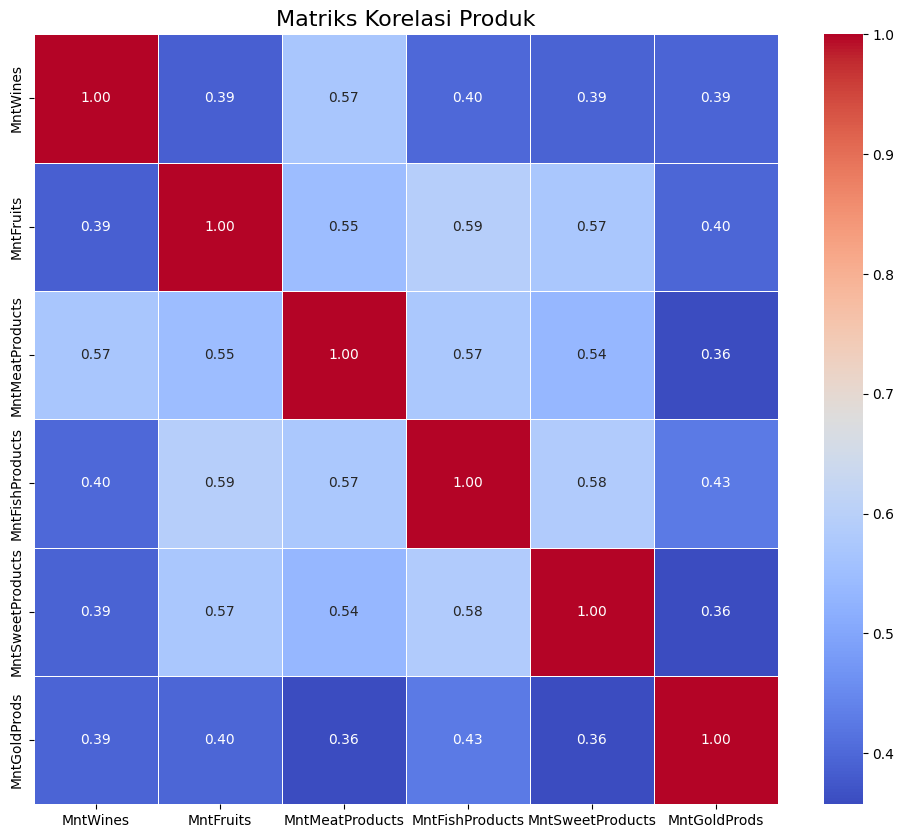

In [212]:
correlation_matrix = data_for_clustering.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title('Matriks Korelasi Produk', fontsize=16)
plt.show()

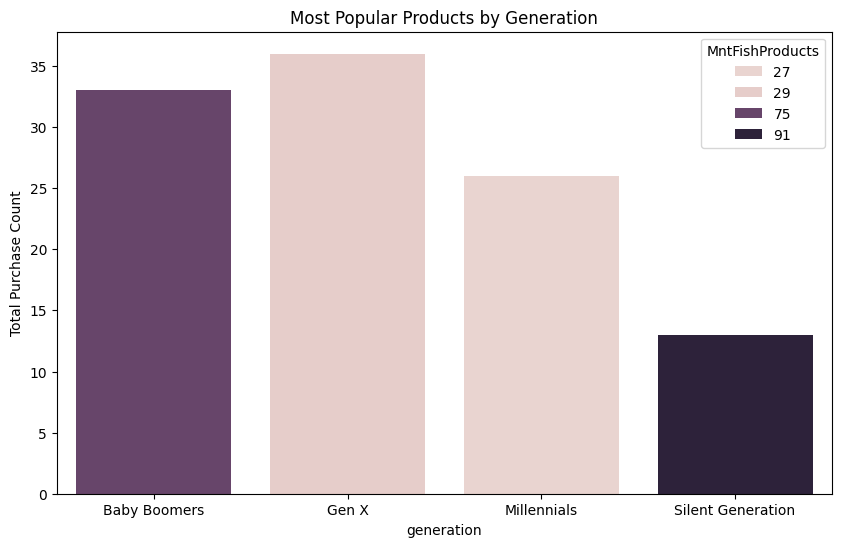

In [213]:
#Most Popular Product by generation (Mnt Fish Product)

# Plot the top product per generation
top_products = popular_products.groupby('generation').first().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='generation', y='NumStorePurchases', hue='MntFishProducts')
plt.title('Most Popular Products by Generation')
plt.ylabel('Total Purchase Count')
plt.show()


# Data Transformation

**Menggabungkan Unique Value Martial Status Menjadi 2 Kategori**

Dilakukan untuk menyederhanakan kolum martial status dari yang 8 values menjadi 2 (single & married)

In [215]:
# Group "Together" and "Married" into "Coupled" and all others into "Single"
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Together',
    'Married': 'Together',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

# Check unique values after grouping
print(df['Marital_Status'].unique())

['Single' 'Together']


**Mengkategorikan "birth_year" Menjadi 4 Generation**



*   Gen Z -> Tahun Lahir >= 1997
*   Millennials -> Tahun Lahir >= 1981
*   Gen X -> Tahun Lahir >= 1965
*   Baby Boomers -> Tahun Lahir >= 1946
*   Silent Generation -> Tahun Lahir = Other


In [216]:
# Assume there's a 'birth_year' column to determine the generation
def assign_generation(year):
    if year >= 1997:
        return 'Gen Z'
    elif year >= 1981:
        return 'Millennials'
    elif year >= 1965:
        return 'Gen X'
    elif year >= 1946:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

# Create a 'generation' column
df['generation'] = df['Year_Birth'].apply(assign_generation)

# Check the data preparation
print(df[['Year_Birth', 'generation']].head())


   Year_Birth    generation
0        1957  Baby Boomers
1        1954  Baby Boomers
2        1965         Gen X
3        1984   Millennials
4        1981   Millennials


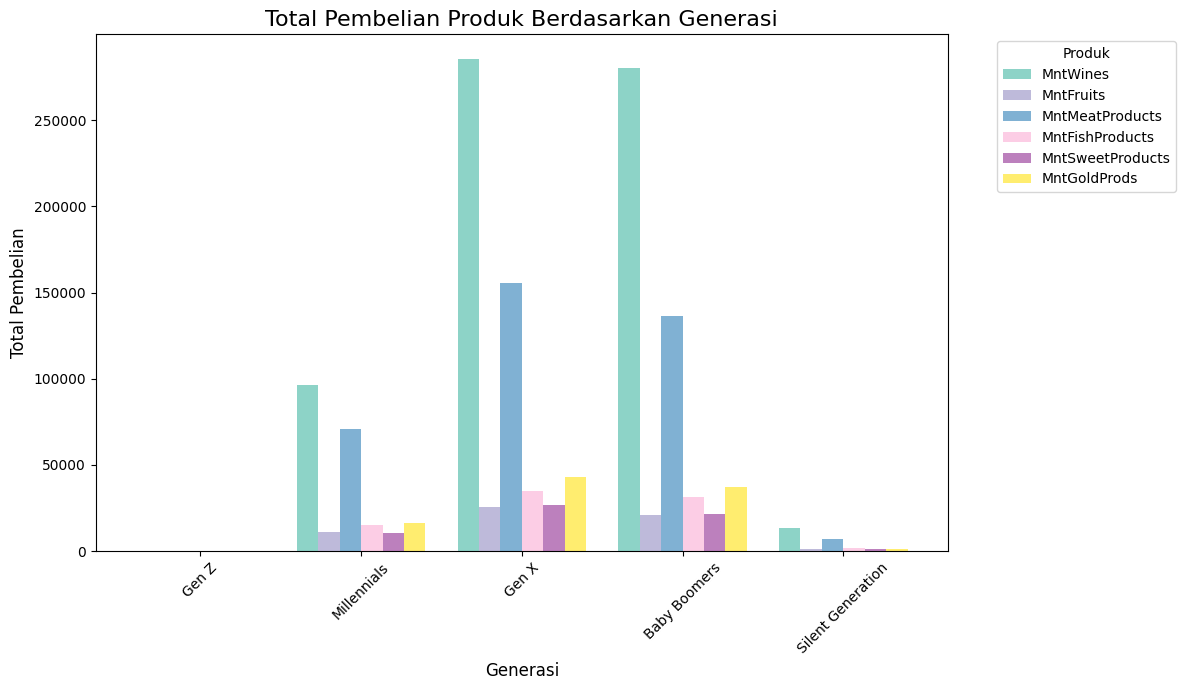

In [217]:
# Kolom produk yang ingin dianalisis
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Agregasikan data berdasarkan 'generation' dan produk, dan isi nilai yang hilang dengan 0
df_aggregated = df.groupby('generation')[product_columns].sum().fillna(0)

# Pastikan semua generasi muncul (misalnya, Gen Z)
all_generations = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']
df_aggregated = df_aggregated.reindex(all_generations, fill_value=0)

# Plot bar chart dengan bar yang bersampingan
ax = df_aggregated.plot(kind='bar', figsize=(12, 7), width=0.8, colormap='Set3')

# Tambahkan judul dan label
plt.title('Total Pembelian Produk Berdasarkan Generasi', fontsize=16)
plt.xlabel('Generasi', fontsize=12)
plt.ylabel('Total Pembelian', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Produk', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()


**Gunakan column-column tertentu**

Dikarenakan dina ingin mengetahui generasi mana yang paling banyak membeli produk tertentu, kolom yang dipakai hanya "generation", "Year_Birth", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"

In [218]:
df_new = df[['generation', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', "NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"]]
df_new.head()

,generation,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
0,Baby Boomers,1957,635,88,546,172,88,88,8,4,10
1,Baby Boomers,1954,11,1,6,2,1,6,1,2,1
2,Gen X,1965,426,49,127,111,21,42,8,10,2
3,Millennials,1984,11,4,20,10,3,5,2,4,0
4,Millennials,1981,173,43,118,46,27,15,5,6,3


Code Breakdown:
1. Group by Generation and Products
2. Sort by Generation and Total Purchases
3. Display the Top 5 Products per Generation

In [219]:
# Replace 'item_purchased' with the correct column name
# Group by generation and item_purchased to get the total purchases
product_popularity = df.groupby(['generation', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])['NumStorePurchases'].sum().reset_index()

# Sort within each generation to find the most popular items
popular_products = product_popularity.sort_values(by=['generation', 'NumStorePurchases'], ascending=[True, False])

# Display top products per generation
print(popular_products.groupby('generation').head(5))


             generation  MntWines  MntFruits  MntMeatProducts  \
607        Baby Boomers       901         31              345   
420        Baby Boomers       410        112              420   
513        Baby Boomers       571         50              142   
530        Baby Boomers       620         26              195   
284        Baby Boomers       207         26              447   
1551              Gen X       757         80              217   
1500              Gen X       635         15              100   
1399              Gen X       445         53              213   
1447              Gen X       532         88              168   
1574              Gen X       829        138              430   
1857        Millennials       163         23              424   
1943        Millennials       758         12              385   
1891        Millennials       347         44              534   
1847        Millennials       124         83              267   
1909        Millennials  

In [220]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

# Encode kolom kategoris
df_new['generation'] = label_encoder.fit_transform(df['generation'])

# Lihat hasilnya
df_new.head()

<ipython-input-220-368e20773616>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['generation'] = label_encoder.fit_transform(df['generation'])


,generation,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
0,0,1957,635,88,546,172,88,88,8,4,10
1,0,1954,11,1,6,2,1,6,1,2,1
2,1,1965,426,49,127,111,21,42,8,10,2
3,2,1984,11,4,20,10,3,5,2,4,0
4,2,1981,173,43,118,46,27,15,5,6,3


# Data Preperation

In [221]:
sc = MinMaxScaler()
df_new2 = pd.DataFrame(sc.fit_transform(df_new), columns=['generation', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', "NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"])
df_new2.head()

,generation,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
0,0.000000,0.621359,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.296296,0.307692,0.357143
1,0.000000,0.592233,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.037037,0.153846,0.035714
2,0.333333,0.699029,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.296296,0.769231,0.071429
3,0.666667,0.883495,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.074074,0.307692,0.000000
4,0.666667,0.854369,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.185185,0.461538,0.107143


In [222]:
# Kolom produk yang ingin dianalisis untuk clustering
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Pilih data untuk clustering
data_for_clustering = df_new2[product_columns].fillna(0)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# K-Means Clustering

In [223]:
# set the parameter for evaluating K

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_for_clustering)
    sse.append(kmeans.inertia_)

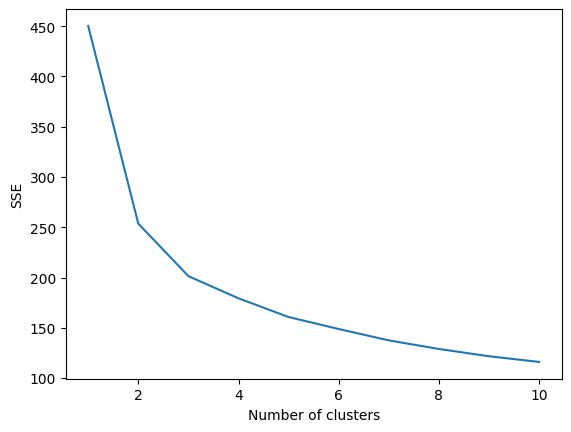

In [224]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [225]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_new2)
y_pred

array([2, 0, 1, ..., 1, 1, 0], dtype=int32)

# K-Mean Visualization

<ipython-input-227-bc89e5d3ece4>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "MntWines", y = "MntMeatProducts", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_new2, s = 60)


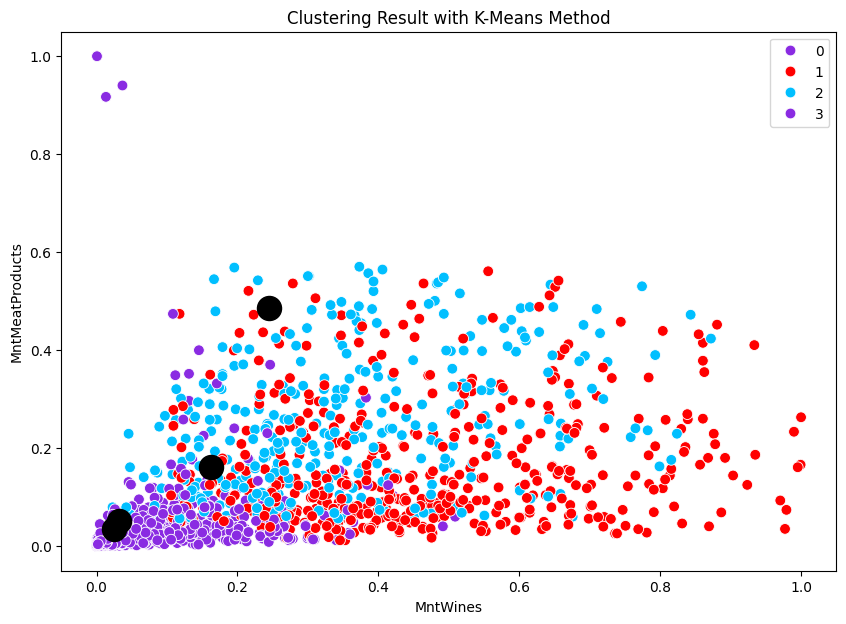

In [227]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = "MntWines", y = "MntMeatProducts", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_new2, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("MntWines")
plt.ylabel("MntMeatProducts")
plt.title("Clustering Result with K-Means Method")
plt.show()

<ipython-input-228-601f6020eec6>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "MntFruits", y = "MntMeatProducts", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_new2, s = 60)


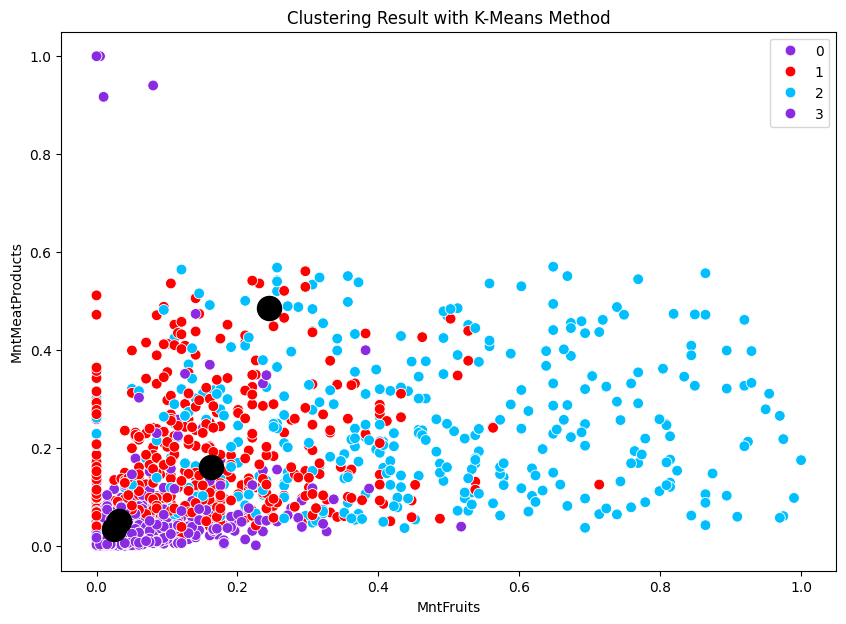

In [228]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = "MntFruits", y = "MntMeatProducts", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_new2, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("MntFruits")
plt.ylabel("MntMeatProducts")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [229]:
# Assuming the scaler was fit only on the numerical columns
scaled_columns = ['generation', 'Year_Birth', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases',
                  'NumCatalogPurchases']

# Inverse transform only the scaled columns
df_inverse_scaled = pd.DataFrame(sc.inverse_transform(df_new2[scaled_columns]), columns=scaled_columns)

# Add the cluster labels back to the DataFrame
df_inverse_scaled['Kmeans'] = y_pred

# Analyze the clusters with the original values
df_inverse_scaled.head()

,generation,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,Kmeans
0,0.0,1957.0,635.0,88.0,546.0,172.0,88.0,88.0,8.0,4.0,10.0,2
1,0.0,1954.0,11.0,1.0,6.0,2.0,1.0,6.0,1.0,2.0,1.0,0
2,1.0,1965.0,426.0,49.0,127.0,111.0,21.0,42.0,8.0,10.0,2.0,1
3,2.0,1984.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,4.0,0.0,3
4,2.0,1981.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,6.0,3.0,3


In [242]:
# Group by 'Kmeans' and calculate summary statistics for the specified columns
kmeans_summary = df_inverse_scaled.groupby('Kmeans').agg({
    'generation': ['mean', 'std', 'min', 'max'],
    'MntWines': ['mean', 'std', 'min', 'max'],
    'MntFruits': ['mean', 'std', 'min', 'max']
})

# Display the summary statistics
kmeans_summary

generation                        MntWines                             \
             mean       std  min  max        mean         std    min     max   
Kmeans                                                                         
0        0.000000  0.000000  0.0  0.0  134.686076  140.684847    0.0   734.0   
1        0.592523  0.649359  0.0  3.0  685.833645  307.369826  141.0  1493.0   
2        1.074271  0.792116  0.0  3.0  517.384615  270.887034   33.0  1302.0   
3        1.294829  0.477449  1.0  3.0   67.004400   97.670939    0.0   760.0   

        MntFruits                         
             mean        std  min    max  
Kmeans                                    
0        8.508861  13.299242  0.0  103.0  
1       27.814953  25.332274  0.0  142.0  
2       91.151194  49.926552  0.0  199.0  
3        6.379538   9.701836  0.0   77.0

In [241]:
# Group by 'Kmeans' and calculate summary statistics for the specified columns
kmeans_summary = df_inverse_scaled.groupby('Kmeans').agg({
    'MntMeatProducts': ['mean', 'std', 'min', 'max'],
    'MntFishProducts': ['mean', 'std', 'min', 'max'],
    'MntSweetProducts': ['mean', 'std', 'min', 'max'],
    'MntGoldProds': ['mean', 'std', 'min', 'max'],
})

# Display the summary statistics
kmeans_summary

MntMeatProducts                           MntFishProducts             \
                  mean         std   min     max            mean        std   
Kmeans                                                                        
0            55.956962   89.473506   1.0   690.0       13.458228  22.537733   
1           279.614953  209.612621  21.0   968.0       41.945794  39.385577   
2           423.053050  236.223484  64.0   984.0      125.814324  63.936783   
3            42.766777  121.575281   0.0  1725.0        9.038504  13.232821   

                   MntSweetProducts                        MntGoldProds  \
        min    max             mean        std  min    max         mean   
Kmeans                                                                    
0       0.0  150.0         8.926582  15.853299  0.0  157.0    26.536709   
1       0.0  210.0        32.917757  32.554489  0.0  173.0    64.022430   
2       0.0  259.0        86.503979  52.588786  0.0  198.0    88.334218   
3       0.0  102.0         6.762376  13.953852  0.0  262.0    21.332233   

                               
              std  min    max  
Kmeans                         
0       34.999428  0.0  227.0  
1       54.899700  0.0  248.0  
2       60.910946  0.0  249.0  
3       31.775501  0.0  321.0

In [231]:
df_inverse_scaled.groupby(y_pred)['Kmeans'].agg(pd.Series.count)

,Kmeans
0,395
1,535
2,377
3,909


# Hierarchical Clustering

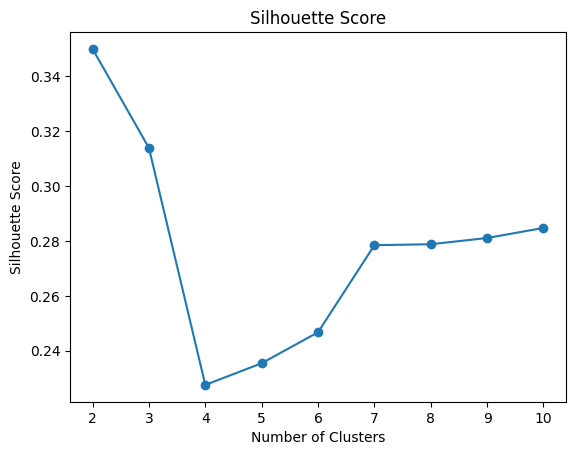

In [232]:
silhouette_scores = []

# The range was changed to start from 2, ensuring at least 2 clusters are formed.
for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_new2, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_new2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o') # Adjusted x-axis range to match the loop
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [233]:
silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_new2)  # X adalah dataset
    score = silhouette_score(df_new2, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.3720651748464095
Jumlah Cluster: 3, Silhouette Score: 0.26718038500712127
Jumlah Cluster: 4, Silhouette Score: 0.27736765619478493
Jumlah Cluster: 5, Silhouette Score: 0.2758144472006996
Jumlah Cluster: 6, Silhouette Score: 0.2559006472673432
Jumlah Cluster: 7, Silhouette Score: 0.2974377047745192
Jumlah Cluster: 8, Silhouette Score: 0.293926276935564
Jumlah Cluster: 9, Silhouette Score: 0.30422067049607454


In [234]:
agglo = AgglomerativeClustering(n_clusters=4)
model2 = agglo.fit_predict(df_new2)

# Step 2: Add Agglomerative Clustering labels to the original DataFrame
df_inverse_scaled['agglo'] = model2

# show the df
df_inverse_scaled.head()

,generation,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,Kmeans,agglo
0,0.0,1957.0,635.0,88.0,546.0,172.0,88.0,88.0,8.0,4.0,10.0,2,0
1,0.0,1954.0,11.0,1.0,6.0,2.0,1.0,6.0,1.0,2.0,1.0,0,3
2,1.0,1965.0,426.0,49.0,127.0,111.0,21.0,42.0,8.0,10.0,2.0,1,0
3,2.0,1984.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,4.0,0.0,3,1
4,2.0,1981.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,6.0,3.0,3,1


In [244]:
agglo_summary = df_inverse_scaled.groupby('agglo').agg({
    'generation': ['mean', 'std', 'min', 'max'],
    'MntWines': ['mean', 'std', 'min', 'max'],
    'MntFruits': ['mean', 'std', 'min', 'max'],

})

agglo_summary

generation                        MntWines                           \
            mean       std  min  max        mean         std  min     max   
agglo                                                                       
0       1.199262  0.730229  0.0  3.0  608.064576  301.737332  8.0  1478.0   
1       1.248746  0.434819  1.0  3.0  102.776329  158.527154  0.0  1048.0   
2       0.010152  0.100373  0.0  1.0  566.870558  332.070643  7.0  1493.0   
3       0.000000  0.000000  0.0  0.0   73.134276   76.161663  0.0   350.0   

       MntFruits                         
            mean        std  min    max  
agglo                                    
0      68.691882  52.830695  0.0  199.0  
1       7.521565  11.475694  0.0   70.0  
2      31.403553  31.146409  0.0  162.0  
3       4.600707   7.554502  0.0   47.0

In [243]:
agglo_summary = df_inverse_scaled.groupby('agglo').agg({
    'MntMeatProducts': ['mean', 'std', 'min', 'max'],
    'MntFishProducts': ['mean', 'std', 'min', 'max'],
    'MntSweetProducts': ['mean', 'std', 'min', 'max'],
    'MntGoldProds': ['mean', 'std', 'min', 'max'],

})

agglo_summary

MntMeatProducts                           MntFishProducts             \
                 mean         std   min     max            mean        std   
agglo                                                                        
0          390.933579  244.355615   5.0   984.0       96.151292  70.635688   
1           53.178536  123.630068   0.0  1725.0       11.619860  19.328042   
2          247.502538  198.340138  21.0   925.0       45.631980  42.433652   
3           27.003534   29.121353   1.0   180.0        6.102473   9.203381   

                  MntSweetProducts                        MntGoldProds  \
       min    max             mean        std  min    max         mean   
agglo                                                                    
0      0.0  259.0        66.514760  53.573509  0.0  198.0    77.036900   
1      0.0  179.0         9.257773  19.223708  0.0  262.0    24.296891   
2      0.0  189.0        33.992386  34.933342  0.0  174.0    69.002538   
3      0.0   65.0         4.318021   6.280494  0.0   30.0    15.060071   

                              
             std  min    max  
agglo                         
0      59.151444  0.0  249.0  
1      34.738006  0.0  321.0  
2      58.183071  0.0  248.0  
3      14.559487  0.0   67.0

In [236]:
df_inverse_scaled.groupby("agglo")["agglo"].agg(pd.Series.count)

,agglo
agglo,
0,542
1,997
2,394
3,283


# Hierarchical Visualization

**Single Linkage**

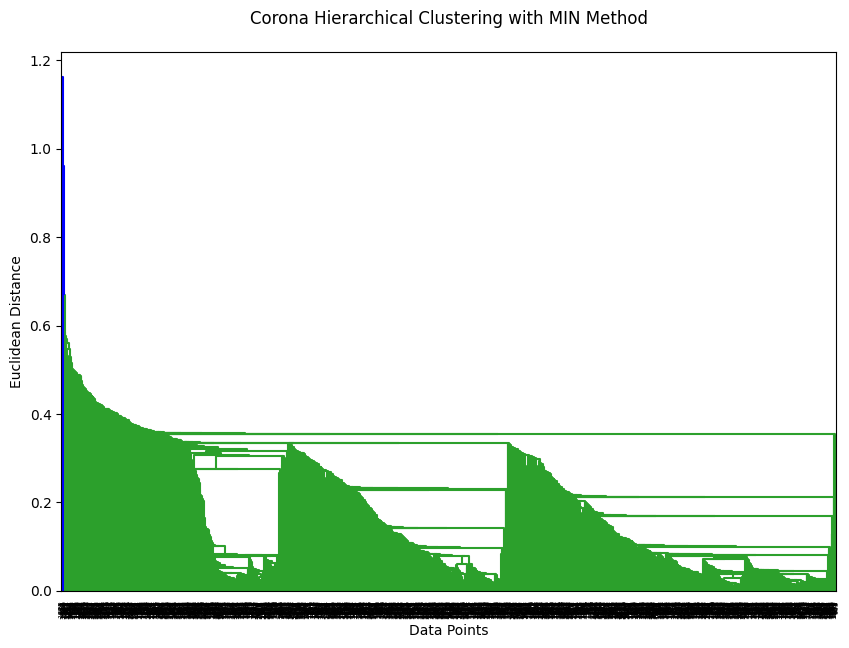

In [237]:
# Buat linkage matrix
linked = linkage(df_new2, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 4

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='blue',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with MIN Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Complete Linkage**

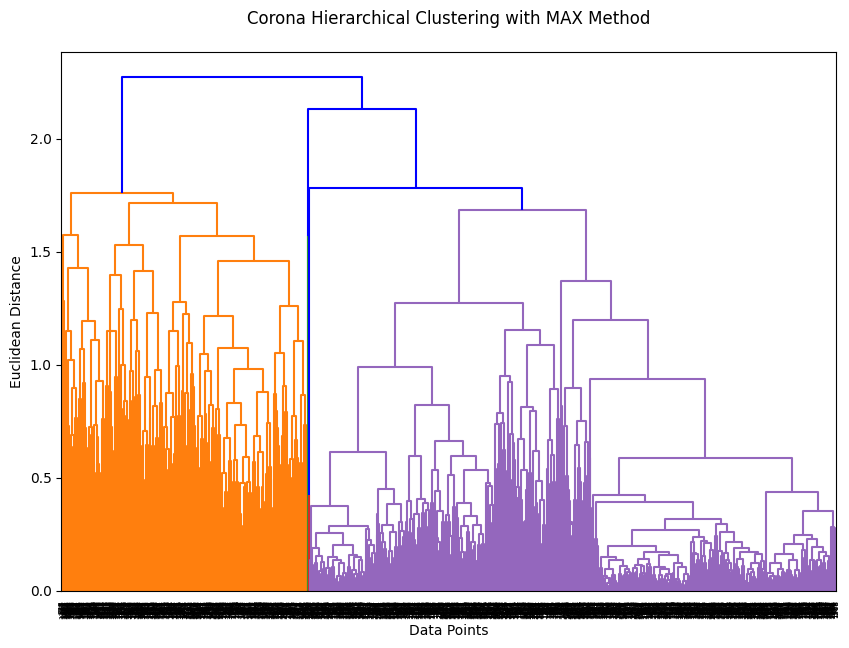

In [238]:
# Max Distance
linked = linkage(df_new2, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with MAX Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Average Linkange**

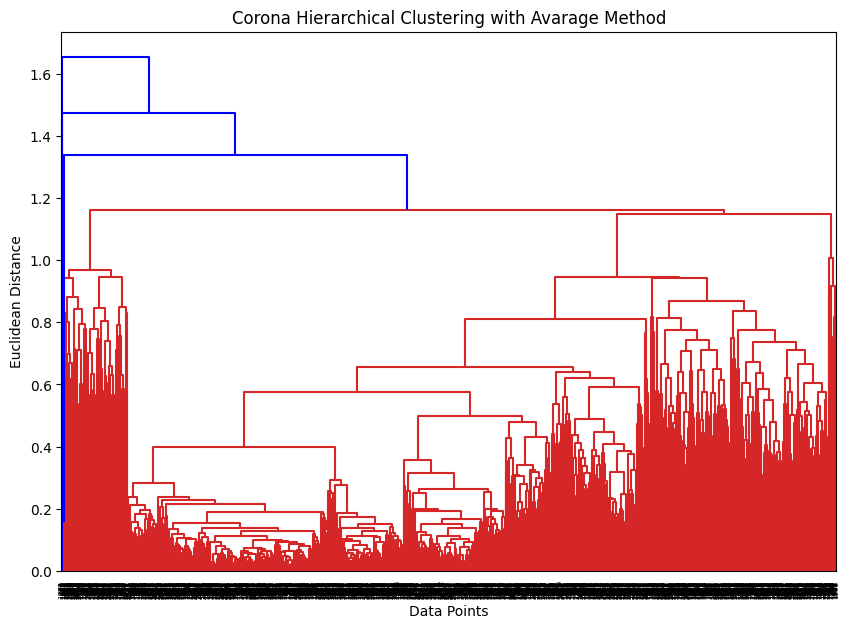

In [239]:
linked = linkage(df_new2, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with Avarage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Ward Linkage**

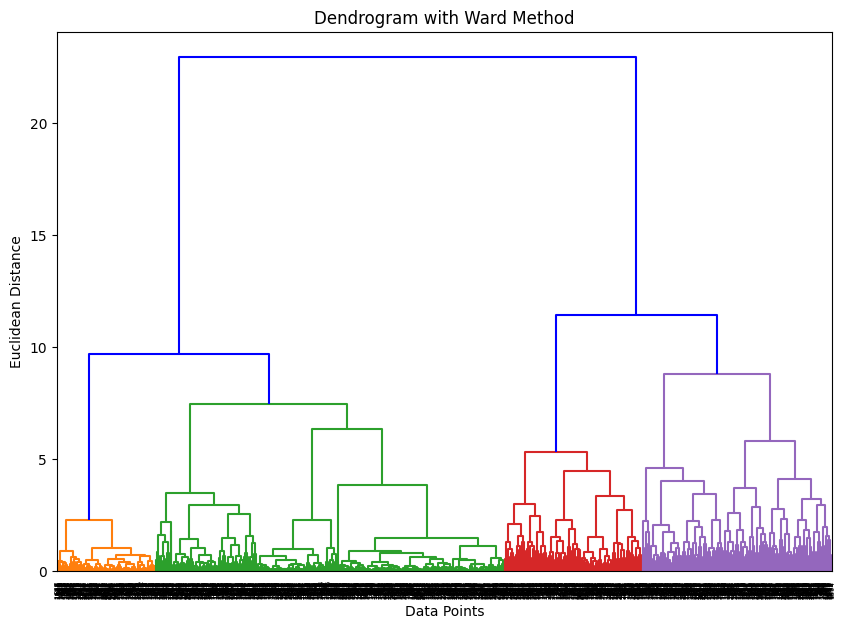

In [240]:
linked = linkage(df_new2, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()